<a href="https://colab.research.google.com/github/parulsharma098/Cardiovascular-Risk-Prediction/blob/main/CARDIOVASCULAR_RISK_PREDICTION_CAPSTONE_III(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<b><u>Project Title : Predicting the Risk Of Cardiovascular Diseases</u></b>





***Cardiovascular diseases (CVDs) are a group of disorders of the heart and blood vessels and include coronary heart disease, cerebrovascular disease, rheumatic heart disease and other conditions.High blood pressure, high blood cholesterol, and smoking are key risk factors for heart disease.There were more than 523.2 million cases of cardiovascular disease in 2019, an increase of 26.6% compared with 2010.***


##**Problem Description**

*The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts.The dataset provides the patient's information. It includes
over 4,000 records and 15 attributes.*



## **Objective**

*The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD) considering the other features.*

In [1]:
%%html
<marquee style='width:100%;'><b><u><h1 style="color:#008000;font-family:fallback;">Cardiovascular Risk Prediction</b></u></marquee>

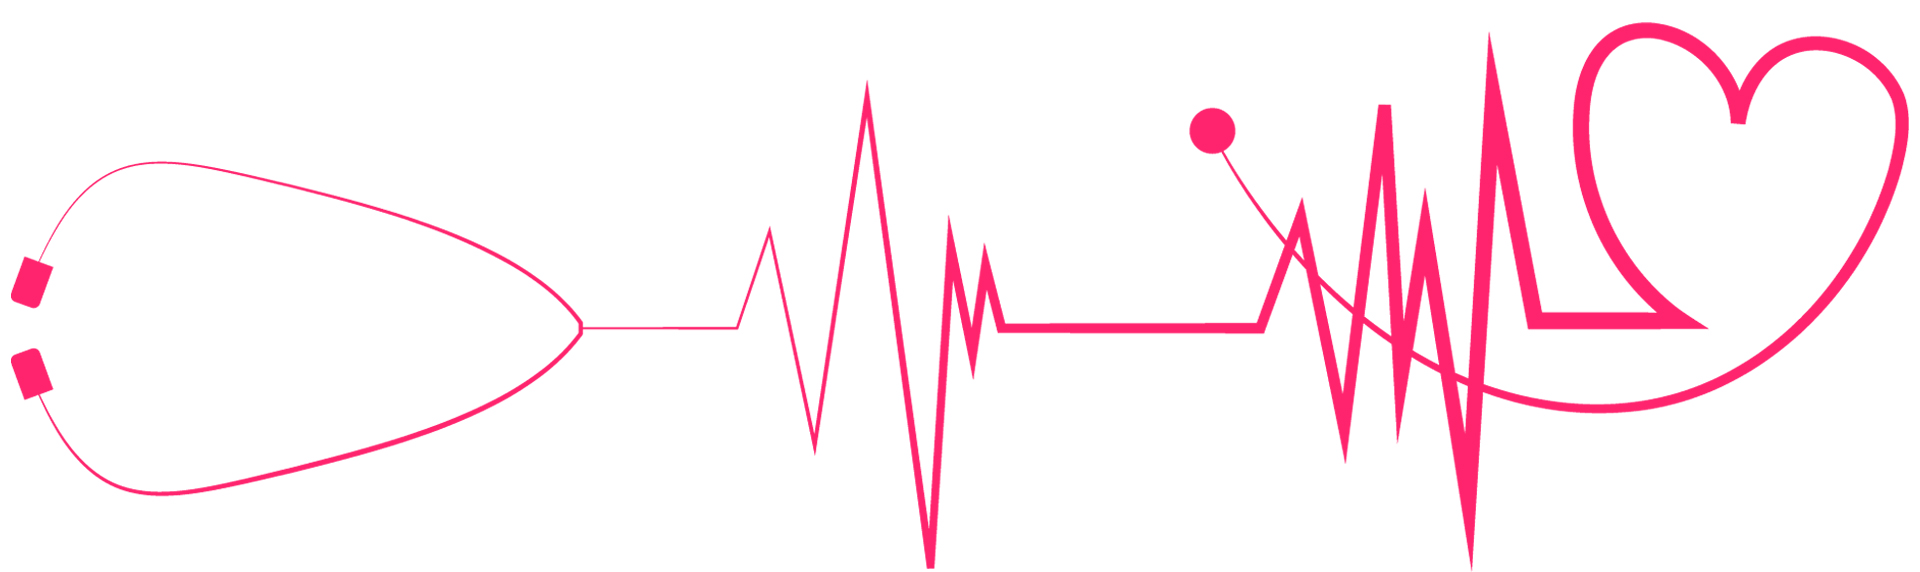

##**Key Facts:**



*   *Cardiovascular diseases (CVDs) are the **leading** cause of **death** globally, taking an estimated **17.9 million** people died from CVDs in **2019**, representing **32%** of all **global deaths**. Of these deaths, **85% were due to heart attack and stroke**.* 
*   *More than **four out of five CVD deaths** are due to **heart attacks** and **strokes**, and **one third of these deaths** occur prematurely in people under **70 years of age**.*
*   *The most important behavioural **risk factors** of heart disease and stroke are **unhealthy diet, physical inactivity, tobacco use and harmful use of alcohol**.*
*   *Over **three quarters** of CVD deaths take place in **low- and middle-income countries**.*







###*Let's get started with this project by simply importing the libraries and the collected data first.*

## **Importing Libraries**

*To do any type of basic analysis or visualization we will be needing some modules or librabies for outcomes. We will be importing libraries like Pandas,numpy(for data manipulation),matplotlib and seaborn(for data visualization).*

In [2]:
#Importing data manipulation libraries.
import pandas as pd
import numpy as np

#The warnings module handles warnings in Python. 
#It would be helpful in throwing away warnings caused.
import warnings
warnings.filterwarnings('ignore')

#Importing data visualization libraries.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## **Loading the Data**

*In this section, we will be importing our data from the google drive and perform some usual data analysis on it later on.*

In [3]:
#Mounting the Google Drive to access the data.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#The variable 'path' contains the path of dataset stored in drive.
#Importing Cardiovascular risk Data File.
path ='/content/drive/MyDrive/CARDIOVASCULAR RISK PREDICTION/'
df = pd.read_csv(path + 'data_cardiovascular_risk.csv',index_col='id')

#Showing the dataframe.
df

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1


## **Variables**

###***Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.***


#**Data Description**

###***Demographic:***

*• **Sex:** male or female("M" or "F")*

*• **Age:** Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)*

###***Behavioral:***

*• **is_smoking:** whether or not the patient is a current smoker ("YES" or "NO")*

*• **Cigs Per Day:** the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)*

###***Medical( history):***

*• **BP Meds:** whether or not the patient was on blood pressure medication (Nominal)*

*• **Prevalent Stroke:** whether or not the patient had previously had a stroke (Nominal)*

*• **Prevalent Hyp:** whether or not the patient was hypertensive (Nominal)*

*• **Diabetes:** whether or not the patient had diabetes (Nominal)*

###***Medical(current):***

*• **Tot Chol:** total cholesterol level (Continuous)*

*• **Sys BP:** systolic blood pressure (Continuous)*

*• **Dia BP:** diastolic blood pressure (Continuous)*

*• **BMI:** Body Mass Index (Continuous)*

*• **Heart Rate:** heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)*

*• **Glucose:** glucose level (Continuous)*

###***Predict variable (desired target):***

***• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”
, “0” means “No”) -
DEPENDANT VARIABLE***

## **Data Inspection**

*Here, we will be performing basic and initial analysis on our raw data to check the data inside of each provided column, check the data type of each column and shape of our data.*

In [5]:
#Checking the first 5 rows.
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [6]:
#Checking the last 5 rows.
df.tail()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [7]:
#Checking the shape of the data.
df.shape

(3390, 16)

In [8]:
#Checking for the title of all the columns.
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [9]:
#Updated Dataset after renaming all the columns.
df.head(2)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0


In [10]:
#Checking for null entries and data type of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


*It is seen that there are **3390 rows and 16 columns**.*

*There are some **NULL values** present in **"education","cigsPerDay","BPMeds","totChol","BMI","heartRate"and "glucose"**.*

*There are **9 float type** columns,**4 int type** columns and **2 object type** columns.* 

**"10yearCHD" is our Target or Dependant variable.**

## **Statistical Analysis**

In [11]:
#Statistical description of all the columns present in the dataset.
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,3390.0,NaN,NaN,NaN,49.542183,8.592878,32.0,42.0,49.0,56.0,70.0
education,3303.0,NaN,NaN,NaN,1.970936,1.019081,1.0,1.0,2.0,3.0,4.0
sex,3390,2,F,1923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_smoking,3390,2,NO,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cigsPerDay,3368.0,NaN,NaN,NaN,9.069477,11.879078,0.0,0.0,0.0,20.0,70.0
BPMeds,3346.0,NaN,NaN,NaN,0.029886,0.170299,0.0,0.0,0.0,0.0,1.0
prevalentStroke,3390.0,NaN,NaN,NaN,0.00649,0.080309,0.0,0.0,0.0,0.0,1.0
prevalentHyp,3390.0,NaN,NaN,NaN,0.315339,0.464719,0.0,0.0,0.0,1.0,1.0
diabetes,3390.0,NaN,NaN,NaN,0.025664,0.158153,0.0,0.0,0.0,0.0,1.0
totChol,3352.0,NaN,NaN,NaN,237.074284,45.24743,107.0,206.0,234.0,264.0,696.0


## **Data Cleansing**

*Data cleansing, also referred to as data cleaning or data scrubbing, is the process of fixing incorrect, incomplete, duplicate or otherwise erroneous data in a data set. It involves identifying data errors and then changing, updating or removing data to correct them. Data cleansing improves data quality and helps provide more accurate, consistent and reliable information for decision-making in an organization.*

**Before proceeding further, let's rename our columns for a better understanding and better efficiency.**

In [12]:
#Renaming the columns for a better view and understanding.
df.rename(columns={'sex':'Gender','is_smoking':'smoking','cigsPerDay':'cigarettes/day','BPMeds':'BP_meds',
                   'prevalentStroke':'stroke','prevalentHyp':'hypertensive',
                   'totChol':'total_cholesterol','sysBP':'systolic_bp','diaBP':'diastolic_bp',
                   'BMI':'bmi','heartRate':'heart_rate','TenYearCHD':'10yearCHD'},
          inplace = True)

In [13]:
#Checking the updated names of the columns.
df.columns

Index(['age', 'education', 'Gender', 'smoking', 'cigarettes/day', 'BP_meds',
       'stroke', 'hypertensive', 'diabetes', 'total_cholesterol',
       'systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose',
       '10yearCHD'],
      dtype='object')

***Lets start checking the duplicates and null values  with a suitable treatment afterwards.***

### **Duplicates:**

In [14]:
#Checking for the duplicated entries in the dataset.
MissV = len(df[df.duplicated()])
print("There are",MissV, "duplicate values.")

There are 0 duplicate values.


***As we can see that there are no duplicates present in the dataset but let's check if we have any missing values.***

### **Missing values:**

In [15]:
#Sum of all the null values present in each column.
for i in df.columns.tolist():
  print("Total missing values in",i,":",df[i].isna().sum())

Total missing values in age : 0
Total missing values in education : 87
Total missing values in Gender : 0
Total missing values in smoking : 0
Total missing values in cigarettes/day : 22
Total missing values in BP_meds : 44
Total missing values in stroke : 0
Total missing values in hypertensive : 0
Total missing values in diabetes : 0
Total missing values in total_cholesterol : 38
Total missing values in systolic_bp : 0
Total missing values in diastolic_bp : 0
Total missing values in bmi : 14
Total missing values in heart_rate : 1
Total missing values in glucose : 304
Total missing values in 10yearCHD : 0


In [16]:
#Sum of the null values overall.
print("Overall missing values are",df.isna().sum().sum())

Overall missing values are 510


*We can be more clear on the exact portion, once we see a percentage distribution of null value counts and how much they'd affect our analysis.*

In [17]:
#Calculating the percentage of NULL values in each column.
totalN = df.isna().sum().sort_values(ascending=False)
percentage = (df.isna().sum()/df.isna().count()).sort_values(ascending=False) * 100
missing_v = pd.concat([totalN, percentage], axis=1, keys=['Total', 'Percentage'])
missing_v

,Total,Percentage
glucose,304,8.967552
education,87,2.566372
BP_meds,44,1.297935
total_cholesterol,38,1.120944
cigarettes/day,22,0.648968
bmi,14,0.412979
heart_rate,1,0.029499
age,0,0.000000
Gender,0,0.000000
smoking,0,0.000000


*Let's Visualize the Null values for a clearer Picture.*

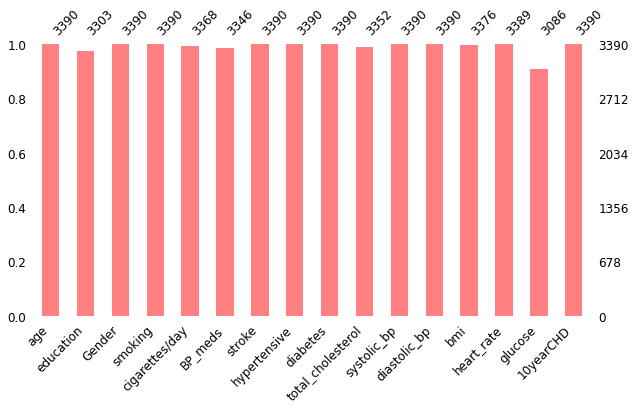

In [18]:
#importing missingno for visualizing the null values.
import missingno as misno

# Visualizing the number of missing values as a bar chart
misno.bar(df,color=(1, 0.5, 0.5),figsize=(10,5), fontsize=12)

*This bar chart is clearly showing that **glucose** and **education** have the most significant null values which can majorly affect our model building process and can also affect the predictions later.*

*But the major problem with these null values ​​is that they cannot be estimated from other data inputs. This dataset is from **medical domain**, but the entries in this data are **person-specific** and the values ​​vary from person to person.The chances of two people sharing the same health statistic are very rare.So,we will be removing all the null values of all the features.*

***It could have been imposed by using subtle techniques like KNNImputer, but that might not be as accurate because the other inputs are used to extrapolate null. What is being discussed is nevermore the ideal approach for this type of data.***

# **Feature Engineering and EDA**

*Feature engineering is the process of selecting, manipulating, and transforming raw data into features that can be used in supervised learning. In order to make machine learning work well on new tasks, it might be necessary to design and train better features.*

*Feature engineering consists of various process like*

*   **Feature Creation**
*   **Transformations**
*   **Feature Extraction**

*Feature Engineering is a very important step in machine learning. Feature engineering refers to the process of designing artificial features into an algorithm.*

***Exploratory Data Analysis*** refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.*

*It’s a scientific approach to get the story of the data.It focuses more narrowly on checking assumptions required for model fitting and hypothesis testing. It also helps while handling missing values and making transformations of variables as needed.*



## ***Encoding:***
*We are encoding out Categorical feature values into binary values for a better model training and prediction.*
*A Binary Data is a Data which uses two possible states or values i.e. 0 and 1.*


*   *The (0 and 1) also referred to as (true and false), (success and failure), (yes and no) etc.*

*   *Binary Data is a discrete Data and also used in statistics.*


***Encoding "Gender"and "Smoking" into binary values.***




In [19]:
#Encoding the 'Gender' feature into binary column.
df['Gender'] = np.where(df['Gender'] == 'M',1,0)

In [20]:
#Encoding the 'smoking' feature into binary column.
df['smoking'] = np.where(df['smoking'] == 'YES',1,0)

## **Splitting the Data into Categorical and Numerical Variables**

In [21]:
#Check Unique Values for each variable.
for i in df.columns.tolist():
  print(i,":",df[i].nunique())

age : 39
education : 4
Gender : 2
smoking : 2
cigarettes/day : 32
BP_meds : 2
stroke : 2
hypertensive : 2
diabetes : 2
total_cholesterol : 240
systolic_bp : 226
diastolic_bp : 142
bmi : 1259
heart_rate : 68
glucose : 132
10yearCHD : 2


*Since, It's very clear by  finding out all the unique values in the dataset that there are multiple continuous and categorical features present. we will be seperating categorical and numerical for better exploration and analysis.*

In [22]:
#Extracting categorical features.

cat_features = ['education','Gender','smoking','BP_meds','stroke','hypertensive','diabetes']
print(f'There are {len(cat_features)} Categorical Features.')

There are 7 Categorical Features.


In [23]:
#All the Categorical features.
cat_features

['education',
 'Gender',
 'smoking',
 'BP_meds',
 'stroke',
 'hypertensive',
 'diabetes']

In [24]:
#head of the Categorical columns.
df[cat_features].head()

,education,Gender,smoking,BP_meds,stroke,hypertensive,diabetes
id,,,,,,,
0,2.0,0,1,0.0,0,0,0
1,4.0,1,0,0.0,0,1,0
2,1.0,0,1,0.0,0,0,0
3,1.0,1,1,0.0,0,1,0
4,1.0,0,1,0.0,0,0,0


In [25]:
#Extracting numerical features.

num_features = ['age','cigarettes/day','total_cholesterol','systolic_bp','diastolic_bp','bmi','heart_rate','glucose']
print(f'There are {len(num_features)} Numerical Features.')

There are 8 Numerical Features.


In [26]:
#All the numerical features.
num_features

['age',
 'cigarettes/day',
 'total_cholesterol',
 'systolic_bp',
 'diastolic_bp',
 'bmi',
 'heart_rate',
 'glucose']

In [27]:
#first five rows of numerical columns.
df[num_features].head()

,age,cigarettes/day,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose
id,,,,,,,,
0,64,3.0,221.0,148.0,85.0,NaN,90.0,80.0
1,36,0.0,212.0,168.0,98.0,29.77,72.0,75.0
2,46,10.0,250.0,116.0,71.0,20.35,88.0,94.0
3,50,20.0,233.0,158.0,88.0,28.26,68.0,94.0
4,64,30.0,241.0,136.5,85.0,26.42,70.0,77.0


***After splitting the dataset we have 7 categorical and 8 numerical variables.***

# **Handling Missing Values**

*Handling the missing values is one of the greatest challenges faced by analysts, because making the right decision on how to handle it generates robust data models.*

*Let us look at different ways of imputing the missing values*

1.   **Deleting Rows**
2.   **Replacing With Mean/Median/Mode**
3.   **Assigning An Unique Category**
4.**Nearest Neighbors Imputations (KNNImputer)**

*We will be using the **first(1)** and **second(2)** way.*



## ***Dropping All the Null Values:***

*Dropping all the missing values from the columns, It will not be a good idea to treat these columns with other popular techniques because of the nature and sensitivity of this dataset. It will not be quite justified the treatment. The best treatment is just dropping them.*

### **Before**

In [28]:
#Checking the null count before removal of the null values.
df[['cigarettes/day','BP_meds','total_cholesterol','bmi','heart_rate','glucose']].isna().sum()

cigarettes/day        22
BP_meds               44
total_cholesterol     38
bmi                   14
heart_rate             1
glucose              304
dtype: int64

In [29]:
#Dropping the null values from the data.
df.dropna(subset=['cigarettes/day','BP_meds','total_cholesterol','bmi','heart_rate','glucose'],inplace= True)

## **After**

In [30]:
#Checking the null count after removal of the null values.
df[['cigarettes/day','BP_meds','total_cholesterol','bmi','heart_rate','glucose']].isna().sum()

cigarettes/day       0
BP_meds              0
total_cholesterol    0
bmi                  0
heart_rate           0
glucose              0
dtype: int64

***We have dropped education here beacause dropping only the missing values removes whole row and it will lead to shrink the data as we already have small dataset.So,We will be dropping the education column since it is not directly related with our target feature.***

In [31]:
# #Dropping Education from the dataset.
df.drop(['education'], axis=1, inplace=True)

In [32]:
#Checking the count of null values in each column after treatment.
df.isna().sum()

age                  0
Gender               0
smoking              0
cigarettes/day       0
BP_meds              0
stroke               0
hypertensive         0
diabetes             0
total_cholesterol    0
systolic_bp          0
diastolic_bp         0
bmi                  0
heart_rate           0
glucose              0
10yearCHD            0
dtype: int64

*Now, Our dataset is free of null/missing values.*

## **EDA:**

## ***10yearCHD(Dependant Variable):***

In [33]:
# Checking the total people who have a risk of CHD(Coronary Heart Disease).
df["10yearCHD"].value_counts()

0    2547
1     457
Name: 10yearCHD, dtype: int64

*Here, 10yearCHD signifies if the person has a risk of heart disease or not. It's a binary attribute(binary: “1”, means “Yes”, “0” means “No”) resembling the diagnosis results for patients. We can use this attribute to see how many patients have a risk of CHD.*

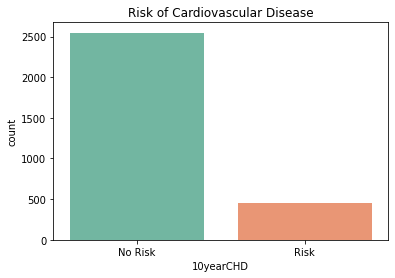

In [34]:
# plotting number of patients at risk of CHD vs those whose results are normal.
g = sns.countplot(df['10yearCHD'],palette = "Set2")
g.set_xticklabels(['No Risk','Risk'])
g.set_title('Risk of Cardiovascular Disease')
plt.show()

###**Observation:**

 *Looking at this count plot of target variable shows that
the percentage/count of people with normal results are pretty high and this creates the problem of class imbalance. It could create problems for model to perform better because it will be overfitted with entries of normal patients and hence, It will become hard to predict for a person with a CHD because the model would be biased towards "No Risk".*

*So we have to convert this data into a balance class, we will treat this imbalance using SMOTE, during train/test split.*

# **Analyzing Categorical  features:**

## **Gender**

In [35]:
# Counting the number of males and females.
df["Gender"].value_counts()

0    1657
1    1347
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Count plot of Gender with Target Variable')

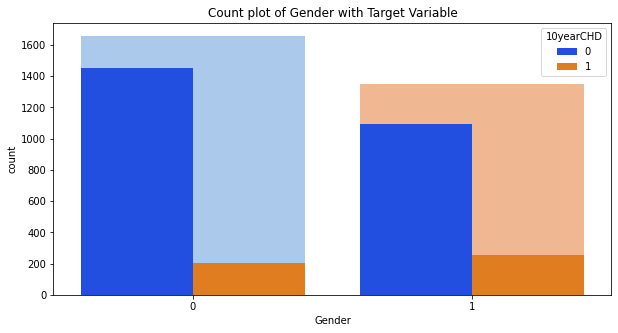

In [36]:
# Plotting the bar graph with number of males and females.
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(df['Gender'], ax=ax, palette='pastel')
sns.countplot(df['Gender'], hue=df['10yearCHD'],ax=ax, palette='bright')
plt.xlabel('Gender')
plt.title('Count plot of Gender with Target Variable')

###**Observation:**

*We can see that number of **female(0)** entries are more than **males(1)**. Since the data is a bit biased towards females, the model would be much more optimal to predict for a female patient.*

## **smoking**

*Smoking only about one cigarette per day carries a risk of developing coronary heart disease, around half that for people who smoke 20 per day. No safe level of smoking exists for cardiovascular disease.*

In [37]:
# Counting the number of smokers and non-smokers.(Yes = 1,No = 0)
df["smoking"].value_counts()

0    1524
1    1480
Name: smoking, dtype: int64

*Almost the same number of entries by smokers and non- smokers. This feature is  the ideal type since, it will not create any imbalance in class and it won't create any kind of bias*

Text(0.5, 1.0, 'Count plot of Smoking with Target Variable')

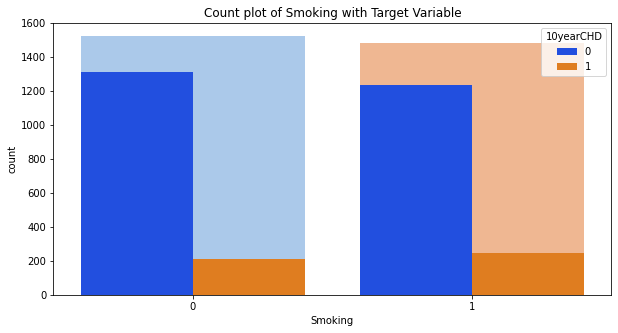

In [38]:
# Plotting number of people smoking vs not smoking.
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(df['smoking'], ax=ax, palette='pastel')
sns.countplot(df['smoking'], hue=df['10yearCHD'],ax=ax, palette='bright')
plt.xlabel('Smoking')
plt.title('Count plot of Smoking with Target Variable')

###**Observation:**

*From this plot we can conclude that, the **non-smokers(0)** are at slightly lower risk of getting diagnosed by CHD in 10 years as compares to those who **smoke(1)**.*

*Let us futher analyse how many males and females are smoking according to 'Gender' and 'smoking' features.*

### **male smokers**

In [39]:
# Number of males who smokes cigarette.
male_smokers = df.loc[(df['smoking']==1) & (df['Gender']==1)]

In [40]:
#Checking for the males who are smokers.
ms= male_smokers.shape[0]
print(f'There are total of {ms} male smokers who at least smoke one cigarette a day.')

There are total of 828 male smokers who at least smoke one cigarette a day.


### **female smokers**

In [41]:
# Number of females who smokes cigarette.
female_smokers = df.loc[(df['smoking']==1) & (df['Gender']==0)]

In [42]:
#Checking for females who are smokers.
fs = female_smokers.shape[0]
print(f'There are total of {fs} female smokers who at least smoke one cigarette a day.')

There are total of 652 female smokers who at least smoke one cigarette a day.


*From this individual analysis we can say that although the entries by females are higher than males but the number of smokers are more in males.*

### **BP_meds:**

*Blood pressure is the pressure of circulating blood against the walls of blood vessels. Most of this pressure results from the heart pumping blood through the circulatory system. When used without qualification, the term "blood pressure" refers to the pressure in the large arteries.*

In [43]:
#Checking the value count of patients who have and have not experienced stroke in the past.
df["BP_meds"].value_counts()

0.0    2913
1.0      91
Name: BP_meds, dtype: int64

Text(0.5, 1.0, 'Count plot of BP_meds with Target Variable')

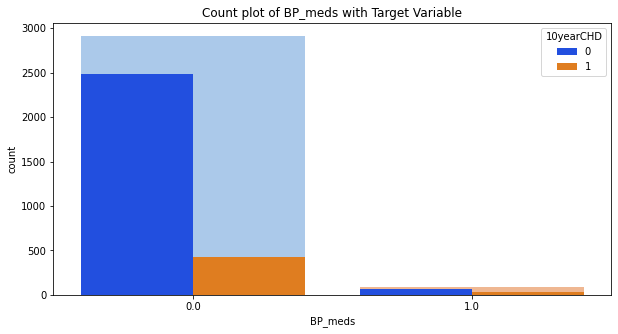

In [44]:
#Plotting the count plot for patients who take BP meds vs patients who do not take BP meds with target variable.
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(df['BP_meds'], ax=ax, palette='pastel')
sns.countplot(df['BP_meds'], hue=df['10yearCHD'],ax=ax, palette='bright')
plt.xlabel('BP_meds')
plt.title('Count plot of BP_meds with Target Variable')

### **Observation:**
*From the above graph we can see that the count of patients who take BP meds are higher,and out of those maximum patients have less chance  of CHD but only few of them are having risk of CHD.*

## **stroke**

*A stroke, sometimes called a brain attack, occurs when something blocks blood supply to part of the brain or when a blood vessel in the brain bursts.*

In [45]:
#Checking the value count of patients who have and have not experienced stroke in the past.
df["stroke"].value_counts()

0    2986
1      18
Name: stroke, dtype: int64

Text(0.5, 1.0, 'Count plot of Stroke with Target Variable')

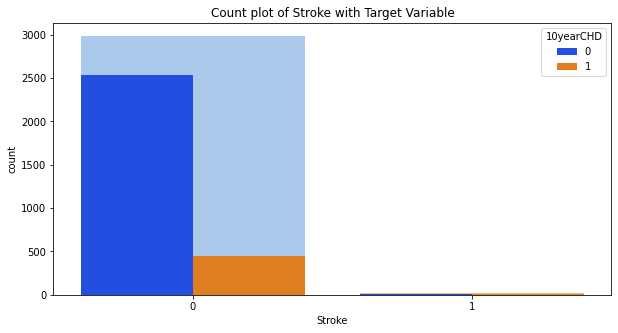

In [46]:
#Plotting the count plot for patients who have experienced stroke vs patients who did not with target variable.
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(df['stroke'], ax=ax, palette='pastel')
sns.countplot(df['stroke'], hue=df['10yearCHD'],ax=ax, palette='bright')
plt.xlabel('Stroke')
plt.title('Count plot of Stroke with Target Variable')

###**Observation:**

*From the value count above we can observe that the data have only 18 patients who have experienced stroke in the past, this will create a huge bias for the patients who have not experienced stroke in the past and the model will predict considering that.*

## **hypertensive**

*Hypertension ̶ or elevated blood pressure ̶ is a serious medical condition that significantly increases the risks of heart, brain, kidney and other diseases. An estimated 1.28 billion adults aged 30-79 years worldwide have hypertension, most (two-thirds) living in low- and middle-income countries.*

In [47]:
#Checking for the value count of the hypertensive and non-hypertensive patients.
df["hypertensive"].value_counts()

0    2058
1     946
Name: hypertensive, dtype: int64

Text(0.5, 1.0, 'Count plot of hypertensive with Target Variable')

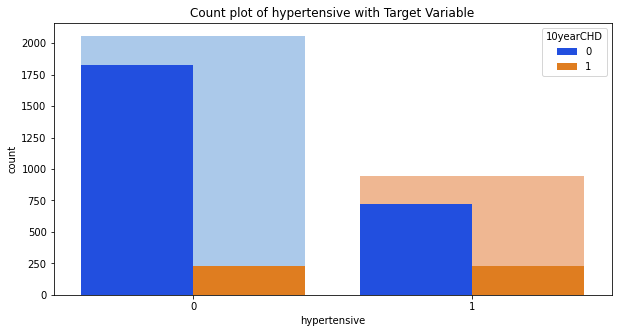

In [48]:
#Plotting the count plot for hypertensive  vs non-hypertensive with target variable.
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(df['hypertensive'], ax=ax, palette='pastel')
sns.countplot(df['hypertensive'], hue=df['10yearCHD'],ax=ax, palette='bright')
plt.xlabel('hypertensive')
plt.title('Count plot of hypertensive with Target Variable')

###**Observation:**

*The plot shows the count of patients who are hypertensive  is quite high than the non-hypertensive patients but by looking at both of the sides we can observe that the patients who are hypertensive are  at high risk of CHD.*

## **diabetes**

*Diabetes is a chronic disease that occurs either when the pancreas does not produce enough insulin or when the body cannot effectively use the insulin it produces. Insulin is a hormone that regulates blood glucose.*

In [49]:
#Checking the value count of diabetic and non-diabetic patients.
df["diabetes"].value_counts()

0    2922
1      82
Name: diabetes, dtype: int64

Text(0.5, 1.0, 'Count plot of diabetes with Target Variable')

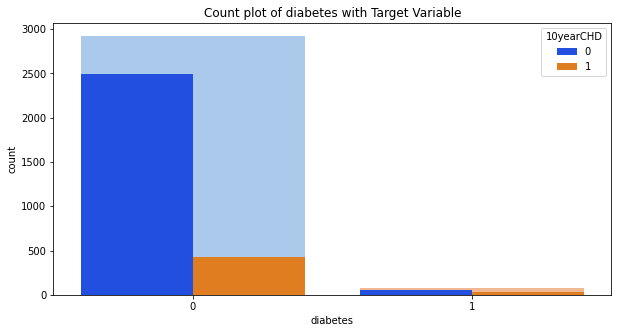

In [50]:
#Plotting the count plot for diabetic vs non-diabetic patients with target variable.
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(df['diabetes'], ax=ax, palette='pastel')
sns.countplot(df['diabetes'], hue=df['10yearCHD'],ax=ax, palette='bright')
plt.xlabel('diabetes')
plt.title('Count plot of diabetes with Target Variable')

###**Observation:**

*From the above graph we can see that there is a huge difference between the patients who are diabetic and non-diabetic.The dataset is biased towards the patients who are not diabetic and the number of diabetic people are very less.*

#**Univariate Analysis**

*Univariate analysis explores variables (attributes) one by one. Variables could be either categorical or numerical.“Uni” means “one”, so in other words your data has only one variable. It doesn’t deal with causes or relationships (unlike regression ) and it’s major purpose is to describe; It takes data, summarizes that data and finds patterns in the data.There are different statistical and visualization techniques of investigation for each type of variable.Here we will be using distplots and boxplots.*

## **Univariate analysis for Numerical Features**

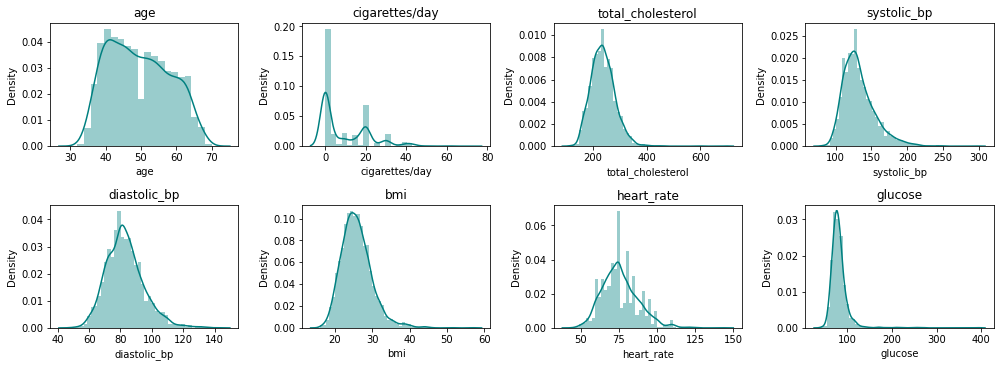

In [51]:
# Making distribution plot for Numerical features for checking the skewness.

n=1
plt.figure(figsize=(14,30))
for i in num_features:
  plt.subplot(12,4,n)
  n= n+1
  sns.distplot(df[i],color='teal')
  plt.title(i)
  plt.tight_layout()

###**Observation:**

*We observed from the above distribution plot of numerical features that the attributes cigarettes/day, total_cholesterol, systolic_bp, bmi, and glucose are slightly right skewed.*

## **Outlier Detection**

*Outlier Analysis is a process that involves identifying the anomalous observation in the dataset. Outliers are extreme values that deviates from the other observations in the dataset.*

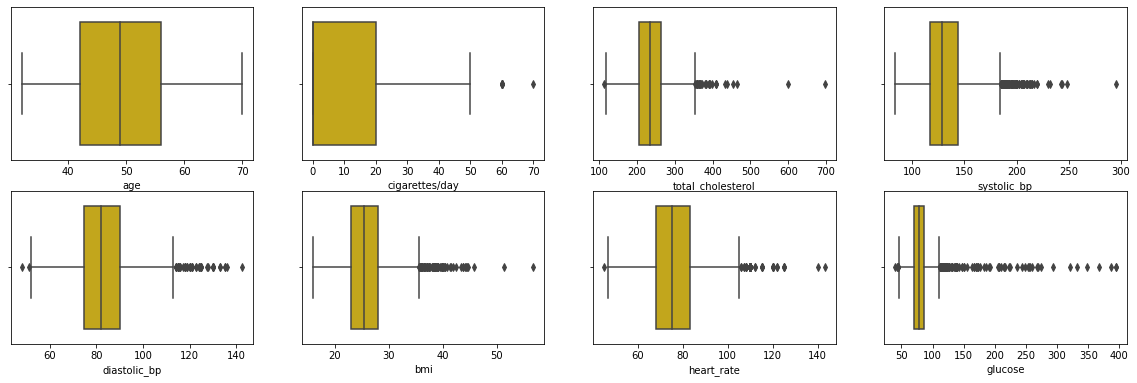

In [52]:
# plotting boxplot for each numerical feature to check for the outliers.

plt.figure(figsize=(20,40), facecolor='white')
plotnumber = 1
for numerical_feature in num_features:
    ax = plt.subplot(12,4,plotnumber)
    sns.boxplot(df[numerical_feature], color='#DEB800')
    plt.xlabel(numerical_feature)
    plotnumber += 1
plt.show()

*We can see a lot of outliers in columns like, **total_cholesterol, systolic_bp, diastolic_bp, bmi, glucose,** etc. As stated before we can't manipulate data in such way that we change the original patient stats, neither we can entirely drop those entries with outliers. This will lead to huge amount of data loss, We would lose meaningful data in order to achieve accurate predictions. The best solution to this could only be, to drop the rows with such outliers with minimal data loss.*



##**Removing the borderline outliers**

*Removing the borderline outliers, We'll try to be considerate and only drop values that do not make any sense or unlikely to occur.*

In [53]:
# Removing values of Cigarette per day greater than 50.
df = df[df["cigarettes/day"] <= 50]
# Removing values of DiaBp greater than 140.
df = df[df['diastolic_bp'] <= 140]
# Removing values of SysBP greater than 250.
df = df[df['systolic_bp'] <= 250]
# Removing values of BMI greater than 50.
df = df[df['bmi'] <= 50]
# Removing values of heart rate greater than 130.
df = df[df["heart_rate"] <= 130]
# Removing values of glucose greater than 300.
df = df[df["glucose"] <= 300]
# Removing values of total cholesterol greater than 500.
df = df[df["total_cholesterol"] <= 500]

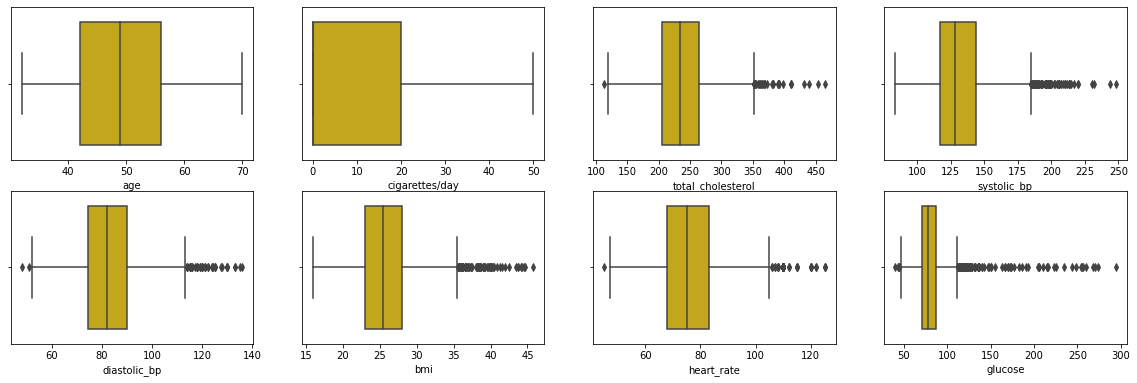

In [54]:
# plotting boxplot for each numerical feature to check for the outliers.

plt.figure(figsize=(20,40), facecolor='white')
plotnumber = 1
for numerical_feature in num_features:
    ax = plt.subplot(12,4,plotnumber)
    sns.boxplot(df[numerical_feature], color='#DEB800')
    plt.xlabel(numerical_feature)
    plotnumber += 1
plt.show()

*Now,we again plotted boxplot after dropping rows with borderline outliers.*

In [55]:
#Information after removing the borderline outliers.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2981 entries, 1 to 3389
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                2981 non-null   int64  
 1   Gender             2981 non-null   int64  
 2   smoking            2981 non-null   int64  
 3   cigarettes/day     2981 non-null   float64
 4   BP_meds            2981 non-null   float64
 5   stroke             2981 non-null   int64  
 6   hypertensive       2981 non-null   int64  
 7   diabetes           2981 non-null   int64  
 8   total_cholesterol  2981 non-null   float64
 9   systolic_bp        2981 non-null   float64
 10  diastolic_bp       2981 non-null   float64
 11  bmi                2981 non-null   float64
 12  heart_rate         2981 non-null   float64
 13  glucose            2981 non-null   float64
 14  10yearCHD          2981 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 372.6 KB


# **Bivariate Analysis**

*Bivariate analysis is stated to be an analysis of any concurrent relation between two variables or attributes. This study explores the relationship of two variables as well as the depth of this relationship to figure out if there are any discrepancies between two variables and any causes of this difference.*

*Here we have shown relationships of **target variable** with all the **numerical variables**.*

## **Age**

Text(0.5, 1.0, 'Count plot of Age with Target Variable')

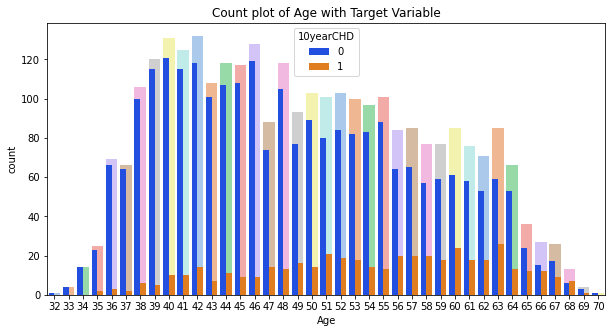

In [56]:
#Plotting count plot of age with target variable.
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(df['age'], ax=ax, palette='pastel')
sns.countplot(df['age'], hue=df['10yearCHD'],ax=ax, palette='bright')
plt.xlabel('Age')
plt.title('Count plot of Age with Target Variable')

### **Observation:**

*In this graph we can see that,between 32 to 40 there is less chance of CHDs.*

*After 40 there is an increase in CHDs and between 51 to 63 the graph shows  highest chance of CHDs and after 63 the chance of CHDs is Decreasing as age increases.*

## **BMI**
<font color ="green">*The BMI is defined as the body mass divided by the square of the body height, and is expressed in units of kg/m².*</font>

*Being overweight or obese increases your risk of developing diabetes and high blood pressure, both of which are risk factors for CVD.*

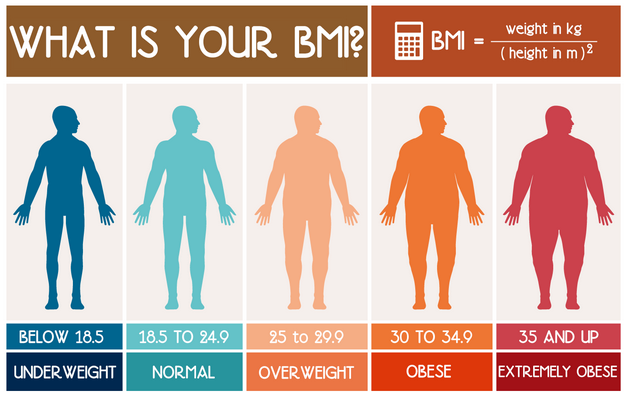

**If your BMI is:**

* below 18.5 – you're in the underweight range
* between 18.5 and 24.9 – you're in the healthy weight range
* between 25 and 29.9 – you're in the overweight range
* between 30 and 39.9 – you're in the obese range

Text(0.5, 1.0, 'Distributions of BMI Vs Gender with Target class')

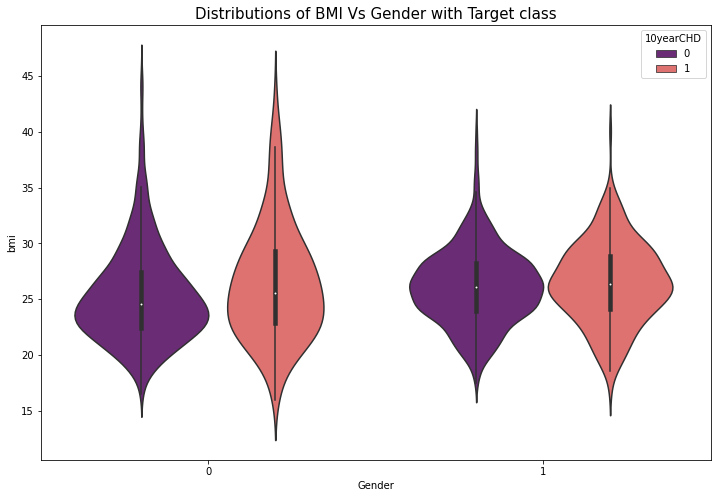

In [57]:
#plotting the boxplot between sex variable and BMI variable with target class
plt.figure(figsize=(12,8))
sns.violinplot(data=df,x="Gender", y='bmi',hue="10yearCHD",palette = 'magma')
plt.title("Distributions of BMI Vs Gender with Target class",fontsize=15)

### **Observation:**

*In this above plot on x axis 0 represents female and 1 represents male, we can say that Female BMI is more than male BMI that leads to overweight.So,Female CHD is more than male CHD in our dataset.*

# **cigarettes/day**

Text(0.5, 1.0, 'Count plot of Age with Target Variable')

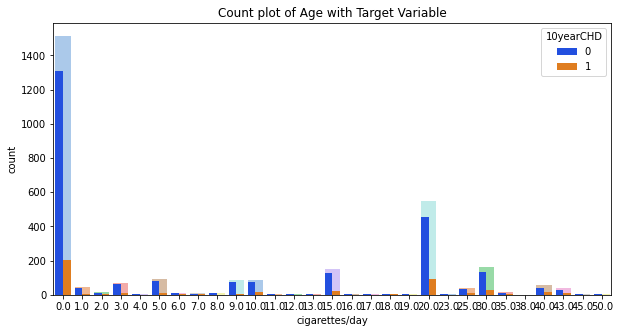

In [58]:
#Plotting count plot of 'cigarettes/day' with target variable.
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(df['cigarettes/day'], ax=ax, palette='pastel')
sns.countplot(df['cigarettes/day'], hue=df['10yearCHD'],ax=ax, palette='bright')
plt.xlabel('cigarettes/day')
plt.title('Count plot of Age with Target Variable')

### **Observation:**



## **Total_Cholesterol**

*Cholesterol is a fatty substance found in the blood. If you have high cholesterol, it can cause your blood vessels to narrow and increase your risk of developing a blood clot.*

* High cholesterol is when you have too much of a fatty substance called cholesterol in your blood.
* It's mainly caused by eating fatty food, not exercising enough, being overweight, smoking and drinking alcohol. It can also run in families.
* You can lower your cholesterol by eating healthily and getting more exercise. Some people also need to take medicine.
* Too much cholesterol can block your blood vessels. It makes you more likely to have heart problems or a stroke.
* High cholesterol does not cause symptoms. You can only find out if you have it from a blood test.

Text(0.5, 1.0, 'Distributions of Gender Vs Total Cholesterol with Target class')

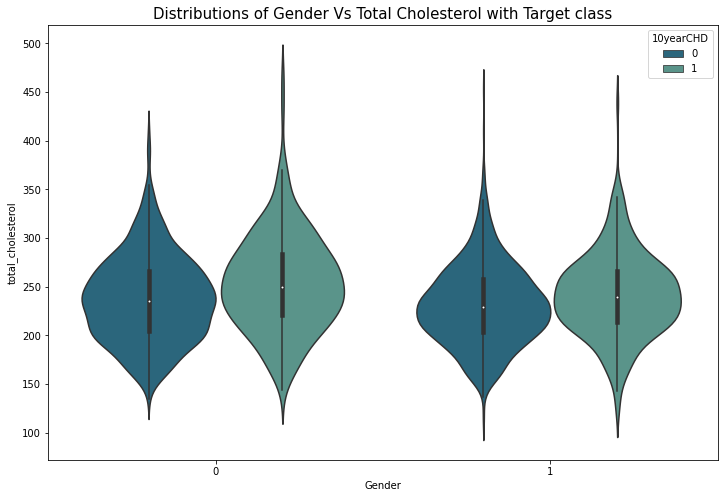

In [59]:
#plotting the boxplot between sex variable and totChol variable with target class
plt.figure(figsize=(12,8))
sns.violinplot(data=df,x="Gender", y='total_cholesterol',hue="10yearCHD",palette = 'crest_r')
plt.title("Distributions of Gender Vs Total Cholesterol with Target class",fontsize=15)

### **Observation:**

*Female has more cholesterol as compared to male. so, it can cause your blood vessels to narrow and increases your risk of developing a blood clot.*
*In simple terms,more cholesterol leads to increase in CHD problems.*

## **Heart_Rate**

*The number of heartbeats per unit of time, usually per minute. The heart rate is based on the number of contractions of the ventricles (the lower chambers of the heart). The heart rate may be too fast (tachycardia) or too slow (bradycardia). The pulse is a bulge of an artery from waves of blood that course through the blood vessels each time the heart beats. The pulse is often taken at the wrist to estimate the heart rate.*

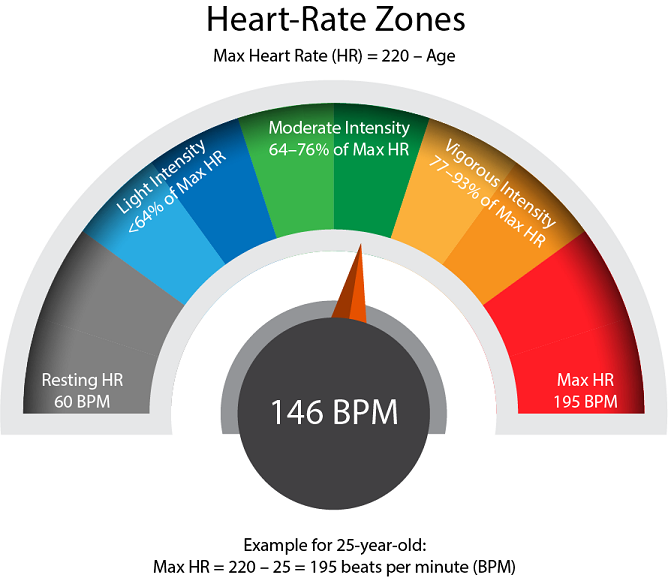

Text(0.5, 1.0, 'Distributions of Gender Vs heart_rate with Target class')

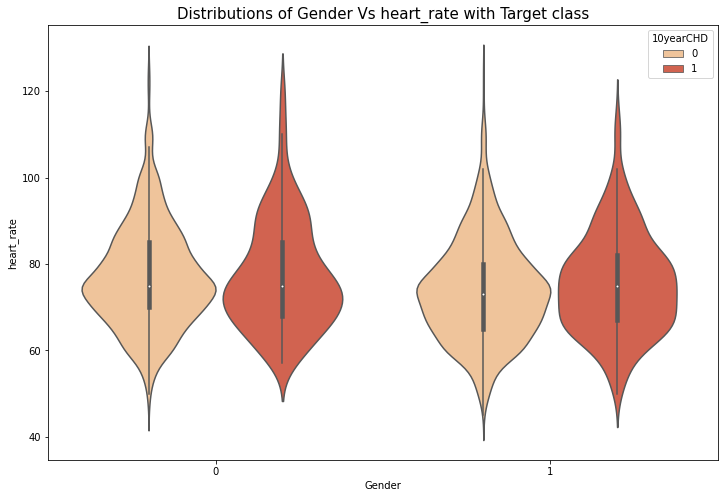

In [60]:
#plotting the boxplot between Gender variable and heart_rate variable with target class.
plt.figure(figsize=(12,8))
sns.violinplot(data=df,x="Gender", y='heart_rate',hue="10yearCHD",palette = 'OrRd')
plt.title("Distributions of Gender Vs heart_rate with Target class",fontsize=15)


### **Observation:**

*As we can see the violin plot we can say that, Females have high heart rate as compared to males.*

## **Glucose**

*A fasting blood sugar level of 99 mg/dL or lower is normal, 100 to 125 mg/dL indicates you have prediabetes, and 126 mg/dL or higher indicates you have diabetes.*

Text(0.5, 1.0, 'Distributions of Gender Vs glucose with Target class')

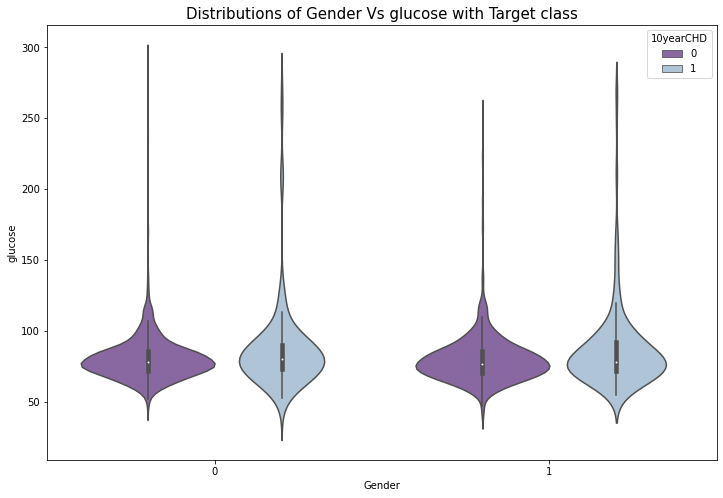

In [61]:
#ploting the boxplot between sex variable and glucose variable with target class
plt.figure(figsize=(12,8))
sns.violinplot(data=df,x="Gender", y='glucose',hue="10yearCHD",palette = 'BuPu_r')
plt.title("Distributions of Gender Vs glucose with Target class",fontsize=15)

### **Observation:**

*In the above violin plot,we can see that males with CHD has more glucose level as compared to females with CHD.*

## **Checking Linearity**

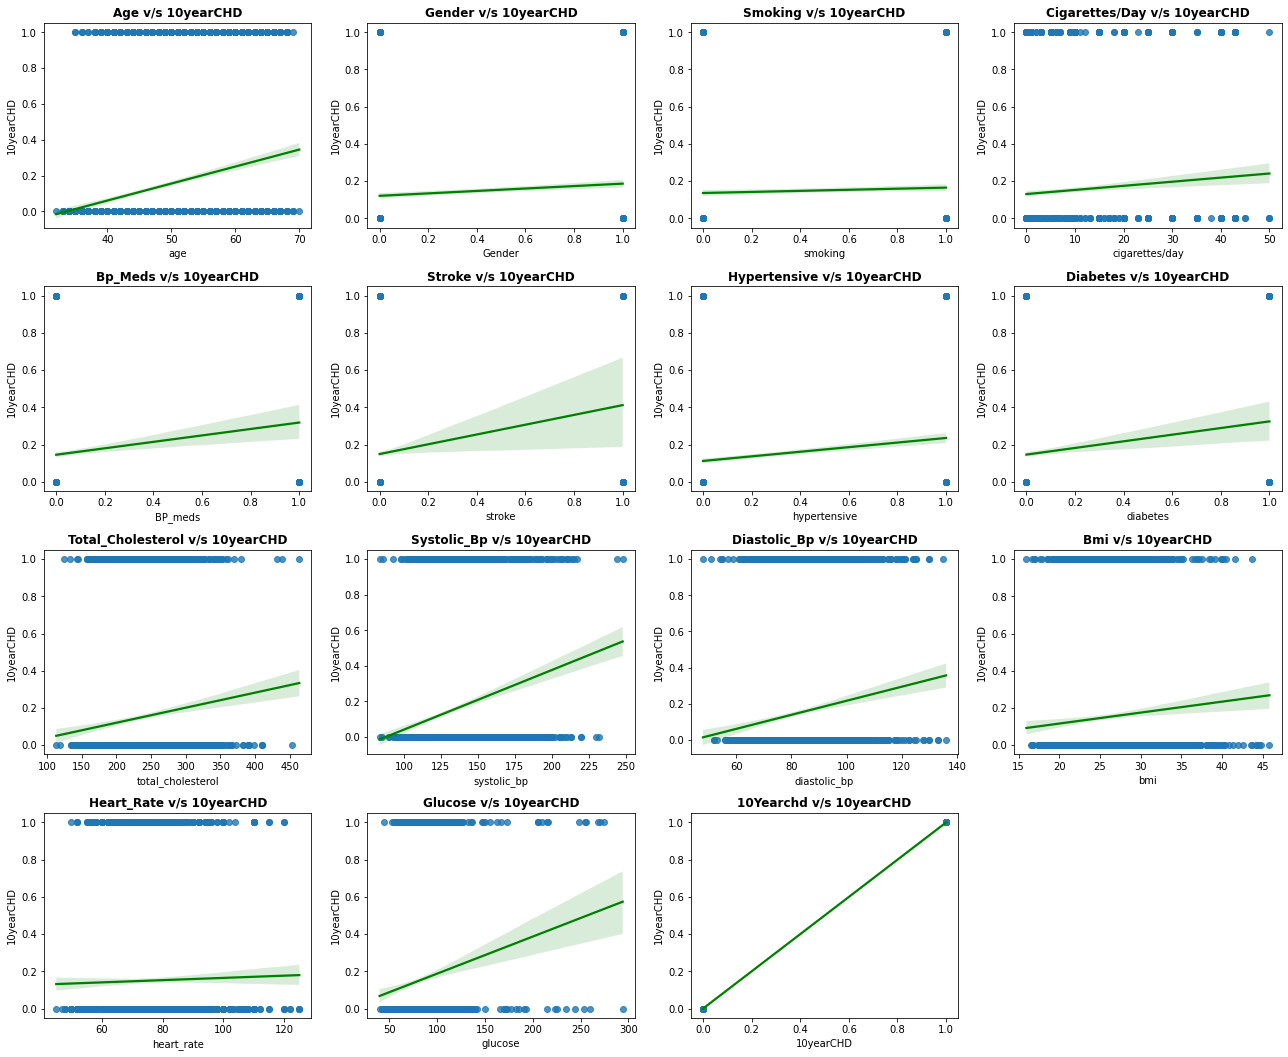

In [62]:
# Checking Linearity using Bivariate analysis.
# list of independent variables.
independent_variables = [i for i in df.columns if i not in ['10yearCHD']]

# defining figure.
plt.figure(figsize=(18,18))

# making subplots for all independent variables vs TenYearCHD(dependent variable).
for n, column in enumerate(df.columns ):
  plt.subplot(5, 4, n+1)
  sns.regplot(x = df[column], y =df['10yearCHD'],line_kws={"color": "green"})
  plt.title(f'{column.title()} v/s 10yearCHD',weight='bold')
  plt.tight_layout()

### **Observation:**

*From these subplots we observed that there is a Positive linearity in all of the variables in our dataset with our target variable i.e. 10yearCHD.*

# **Multivariate Analysis**

*The purposes of multivariate data analysis is to study the relationships among the Provided attributes, classify the n collected samples into homogeneous groups, and make inferences about the underlying populations from the sample.*

# **Checking for Multi-Collinearity**

*Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship.*

*A correlation plot typically contains a number of numerical variables, with each variable represented by a column. The rows represent the relationship between each pair of variables. The values in the cells indicate the strength of the relationship, with positive values indicating a positive relationship and negative values indicating a negative relationship.*

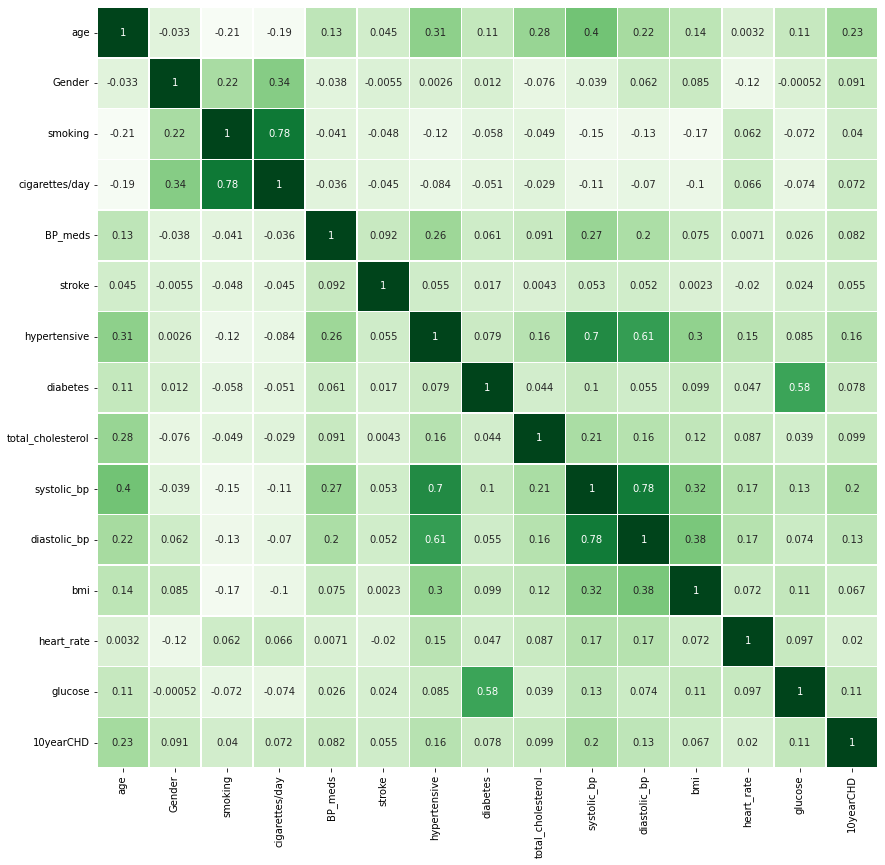

In [63]:
# Defining a Seaborn correlation map(Heatmap).
correlmap = df.corr()

# display the heatmap.
f, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(correlmap,cmap= 'Greens', linewidths=.5,annot=True, ax = ax,cbar=False)

## **Diastolic_bp and Systolic_bp**

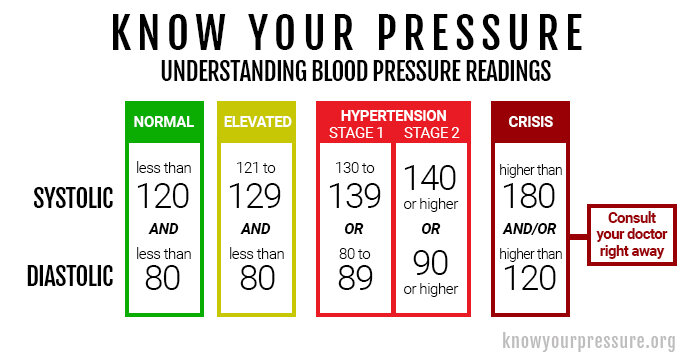

*From the above Heatmap, We can see both of these columns are heavily correleted, there's some relationship we can establish with these two features further.*

*Also Elevation of systolic blood pressure predicts the risk of cardiovascular disease better than increases in diastolic blood pressure. Although associated with more variability in measurement, systolic blood pressure is easier to determine and allows more appropriate risk stratification than diastolic blood pressure.*

*We can combine these two features using the following formula:*

### **MAP = (Systolic Blood Pressure + 2 x Diastolic Blood Pressure) / 3**
*Here, MAP signifies Mean Arterial Pressure*

In [64]:
# Calculating MAP using 'SysBP' and 'DiaBP'.
df["mean_art_pressure"] = (df["systolic_bp"] + 2 * df["diastolic_bp"])/3

In [65]:
# Dropping the SysBP and DiaBp attributes, since they're both included in MAP.
df.drop(columns = ["systolic_bp", "diastolic_bp"], inplace = True)

***Dropping Smoking***

*Since, the cigarette/day column is already having the information about smokers and non-smokers, where we can define by the number of cigarettes consumed by patients.So, we will be dropping the smoking column.*

*(As in cigarette/day column 0 represents patients who are non-smokers)*

In [66]:
#Dropping the smoking.
df.drop(columns = ["smoking"], inplace = True)

### **Checking Multi-collinearity after adjustments**

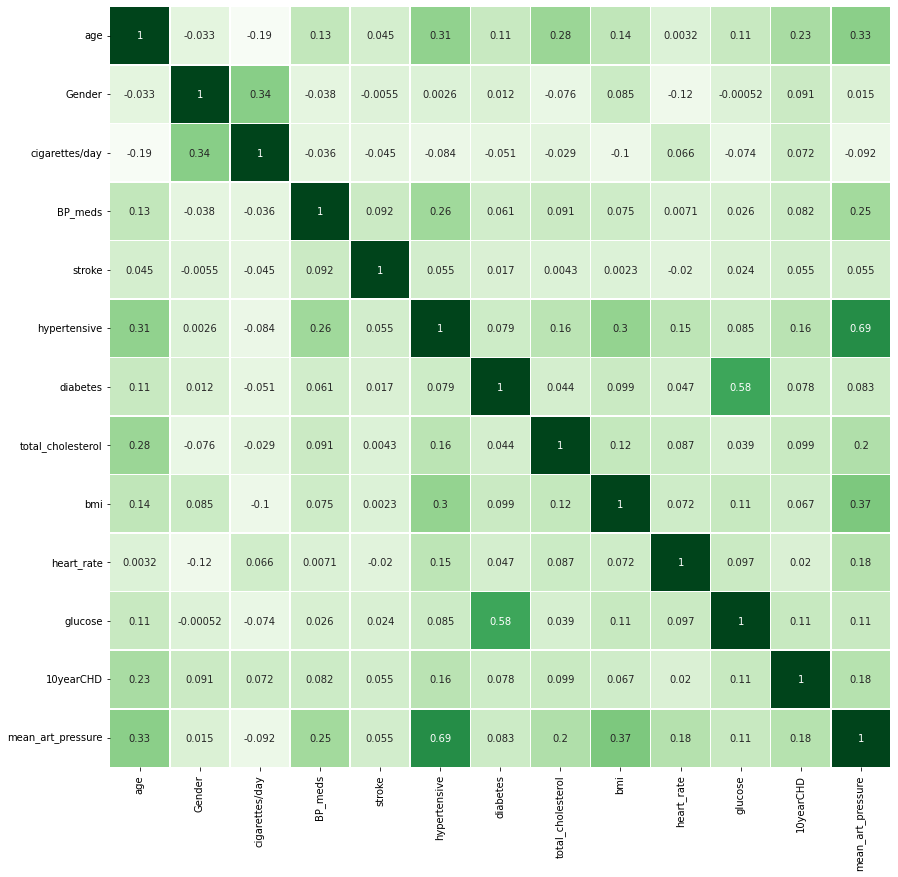

In [67]:
# Defining a Seaborn correlation map(Heatmap).
correlmap = df.corr()

# display the heatmap.
f, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(correlmap,cmap= 'Greens', linewidths=.5,annot=True, ax = ax,cbar=False)

# **One-Hot Encoding:**

*One hot encoding can be defined as the essential process of converting the categorical data variables to be provided to machine and deep learning algorithms which in turn improve predictions as well as classification accuracy of a model.*

In [68]:
#Creating dummy variables from categorical features.
dataset = pd.get_dummies(df,columns = ['Gender','BP_meds','stroke','hypertensive','diabetes'])

In [69]:
#Checking head after creating dummies.
dataset.head()

,age,cigarettes/day,total_cholesterol,bmi,heart_rate,glucose,10yearCHD,mean_art_pressure,Gender_0,Gender_1,BP_meds_0.0,BP_meds_1.0,stroke_0,stroke_1,hypertensive_0,hypertensive_1,diabetes_0,diabetes_1
id,,,,,,,,,,,,,,,,,,
1,36,0.0,212.0,29.77,72.0,75.0,0,121.333333,0,1,1,0,1,0,0,1,1,0
2,46,10.0,250.0,20.35,88.0,94.0,0,86.000000,1,0,1,0,1,0,1,0,1,0
3,50,20.0,233.0,28.26,68.0,94.0,1,111.333333,0,1,1,0,1,0,0,1,1,0
4,64,30.0,241.0,26.42,70.0,77.0,0,102.166667,1,0,1,0,1,0,1,0,1,0
5,61,0.0,272.0,32.80,85.0,65.0,1,141.333333,1,0,1,0,1,0,0,1,1,0


## **Final Dataset**

In [70]:
# Checking the dataset after all the adjustments and transformations.
dataset

,age,cigarettes/day,total_cholesterol,bmi,heart_rate,glucose,10yearCHD,mean_art_pressure,Gender_0,Gender_1,BP_meds_0.0,BP_meds_1.0,stroke_0,stroke_1,hypertensive_0,hypertensive_1,diabetes_0,diabetes_1
id,,,,,,,,,,,,,,,,,,
1,36,0.0,212.0,29.77,72.0,75.0,0,121.333333,0,1,1,0,1,0,0,1,1,0
2,46,10.0,250.0,20.35,88.0,94.0,0,86.000000,1,0,1,0,1,0,1,0,1,0
3,50,20.0,233.0,28.26,68.0,94.0,1,111.333333,0,1,1,0,1,0,0,1,1,0
4,64,30.0,241.0,26.42,70.0,77.0,0,102.166667,1,0,1,0,1,0,1,0,1,0
5,61,0.0,272.0,32.80,85.0,65.0,1,141.333333,1,0,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,61,0.0,217.0,26.98,105.0,113.0,0,118.000000,1,0,1,0,1,0,0,1,1,0
3385,60,0.0,261.0,29.28,70.0,103.0,0,93.833333,1,0,1,0,1,0,1,0,1,0
3386,46,0.0,199.0,21.96,80.0,84.0,0,71.333333,1,0,1,0,1,0,1,0,1,0


In [71]:
#Checking the shape of the dataset after all the transformations.

dataset.shape

(2981, 18)

##**Graph of Imbalance**

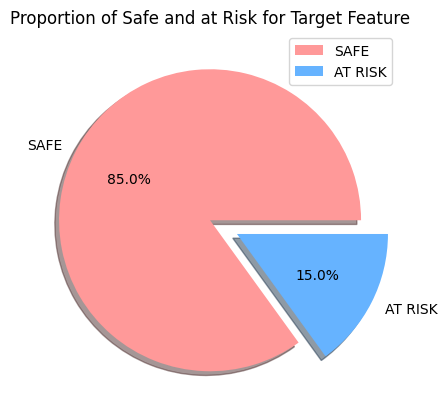

In [72]:
# Plotting the pie chart to check the balance in the dataset.

plt.figure(figsize=(7,5), dpi=100)
proportion = df['10yearCHD'].value_counts()
labels = ['SAFE','AT RISK']
plt.title('Proportion of Safe and at Risk for Target Feature')
plt.pie(proportion, explode=(0,0.2),labels=labels, shadow = True, autopct = '%1.1f%%', colors= ['#ff9999','#66b3ff'])
plt.legend()
plt.show()

***As we can see that our target variable is highly imbalanced.***

***Majority of the data points belong to "SAFE"(no risk of CHD) class. Ratio of "SAFE" class to "AT RISK" class is 17:3.***

In [73]:
# Checking the count of the classes in the target variable.

df['10yearCHD'].groupby(df['10yearCHD']).count()

10yearCHD
0    2533
1     448
Name: 10yearCHD, dtype: int64

## **Scaling:**

***Scaling the Numerical Variables with StandardScaler.***


*StandardScaler is used to resize the distribution of values ​​so that the mean of the observed values ​​is 0 and the standard deviation is 1.*

In [74]:
#Applying normalization operation for numeric stability
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
# X = standardizer.fit_transform(X_resampled)
columns_to_scale =  ['age','cigarettes/day','total_cholesterol','mean_art_pressure','bmi','heart_rate','glucose']
dataset[columns_to_scale] = standardizer.fit_transform(dataset[columns_to_scale])

## **Splitting The Data**

***Train Test Split:*** *The train-test split is a technique for evaluating the performance of a machine learning algorithm.
It can be used for classification or regression problems and can be used for any supervised learning algorithm.The procedure involves taking a dataset and dividing it into two subsets.*

In [75]:
# Splitting the data into set of independent variables and a dependent variable.
X = dataset.drop('10yearCHD',axis=1).values
y = dataset['10yearCHD'].values

In [76]:
#Train test split
from sklearn.model_selection import train_test_split
# Dividing the data in training and test dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0,stratify=y)
# checking the shape of our train and test data.
print(X_train.shape)
print(X_test.shape)

(2235, 17)
(746, 17)


# **Handling Imbalanced Data**

*Handling imbalance of target variable using SMOTE(Synthetic Minority Oversampling Technique)*

In [77]:
#Using SMOTE for oversampling
from imblearn.over_sampling import SMOTE
# Creating the instance
smote = SMOTE(random_state = 42)

In [78]:
# fit predictor and target variable
X_train_sm, y_train_sm = smote.fit_resample(X, y)

In [79]:
# checking the length of our train set before and after handeling imbalance.

print('Original dataset shape', len(X_train))
print('Resampled dataset shape', len(X_train_sm))

Original dataset shape 2235
Resampled dataset shape 5066


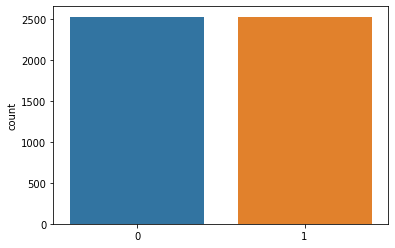

In [80]:
# Plotting the count plot to check the balance after handling imbalance.
sns.countplot(y_train_sm)

In [81]:
# Dataframe to contain Model performance analysis reports.
res_df=pd.DataFrame()

# **Performance Metrics**

*Different performance metrics are used to evaluate machine learning model. Based on our task we can choose our performance metrics. Since our task is of classification and that too binary class classification, whether client will or will not subscribe for deposits.*

*Here we will be using AUC ROC*

***ROC** also known as Receiver Operating Characteristics, shows the performance of binary class classifiers across the range of all possible thresholds plotting between true positive rate and 1-false positive rate.*

***AUC** measures the likelihood of two given random points, one from positive and one from negative, the classifier will rank the positive points above negative points. AUC-ROC is popular classification metric that presents the advantage of being independent of false positive or negative points.*

***Secondary Performance Metrics***

***Macro-F1 Score:** F1 score is the harmonic mean between Precision and Recall. Macro F1 score is used to know how our model works in overall dataset.*

***Confusion Matrix:** This matrix gives the count of true negative, true positive, false positive and false negative data points.*

In [82]:
#Importing Important libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

## **Models**
*Following models have been used for predictions:-*

* Logistic Regression Classifier
* Decision Tree Classifier
* Random Forest Classifier
* K-Nearest Neighbors Classifier
* Gaussian Naive Bayes Classifier
* Extreme Gradient Boost Classifier
* Support Vector Machine Classifier

# **Logistic Regression Classifier**

*Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). Logistic Regression is used when the dependent variable(target) is categorical. The model delivers a binary or dichotomous outcome limited to two possible outcomes: yes/no, 0/1, or true/false.*

*Logical regression analyzes the relationship between one or more independent variables and classifies data into discrete classes. It is extensively used in predictive modeling, where the model estimates the mathematical probability of whether an instance belongs to a specific category or not.*

*For example, 0 – represents a negative class; 1 – represents a positive class. Logistic regression is commonly used in binary classification problems where the outcome variable reveals either of the two categories (0 and 1).*

*Typical properties of the logistic regression equation include:*

* *Logistic regression’s dependent variable obeys ‘Bernoulli distribution*’

* *Estimation/prediction is based on ‘maximum likelihood.’*

* *Logistic regression does not evaluate the coefficient of determination (or R squared) as observed in linear regression’. Instead, the model’s fitness is assessed through a concordance.*

In [83]:
#Importing Logistic Regression from sklearn
from sklearn.linear_model import LogisticRegression


In [84]:
# Creating model object for logistic regression.

clf = LogisticRegression(fit_intercept=True, max_iter=10000)

In [85]:
# fit the model.

clf.fit(X_train_sm,y_train_sm)

LogisticRegression(max_iter=10000)

In [86]:
# Getting the predicted classes for training and testing set

train_class_preds = clf.predict(X_train_sm)
test_class_preds = clf.predict(X_test)

In [87]:
# Getting the accuracy scores for training and testing set.

train_accuracy = accuracy_score(train_class_preds, y_train_sm)
test_accuracy = accuracy_score(test_class_preds, y_test)

# Display accuracies.

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.673509672325306
The accuracy on test data is  0.6621983914209115


In [88]:

# Confusion Matrix for logistic regression classifier.

cf_matrix = confusion_matrix(y_test,test_class_preds)
cf_matrix

array([[414, 220],
       [ 32,  80]])

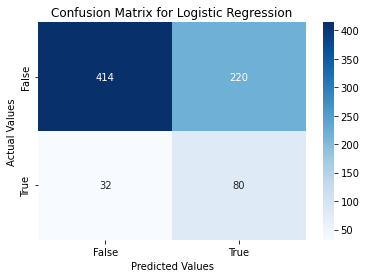

In [89]:
#Plotting the cofusion matrix.
labels = ['414','220','32','80']

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for Logistic Regression');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix.
plt.show()

In [90]:
# Predicted values.
y_pred_log_reg = clf.predict(X_test)

In [91]:
# Getting classification report.

dict_1 = classification_report(y_test, y_pred_log_reg, output_dict = True)

In [92]:
#Adding results to model evaluation dataframe.
tempodf=pd.DataFrame(dict_1).transpose()
tempodf['Model'] = 'Logistic Regression Classifier'
res_df=res_df.append(tempodf[2:-2])
res_df

,precision,recall,f1-score,support,Model
accuracy,0.662198,0.662198,0.662198,0.662198,Logistic Regression Classifier


# **Decision Tree Classifier**
*Decision trees can be used for classification as well as regression problems. The name itself suggests that it uses a flowchart like a tree structure to show the predictions that result from a series of feature-based splits. It starts with a root node and ends with a decision made by leaves.*

*Decision trees are upside down which means the root is at the top and then this root is split into various several nodes. Decision trees are nothing but a bunch of if-else statements in layman terms. It checks if the condition is true and if it is then it goes to the next node attached to that decision.*

*In a Decision Tree diagram, we have:*

**Root Node:** *The first split which decides the entire population or sample data should further get divided into two or more homogeneous sets. In our case, the Outlook node.*

**Splitting:** *It is a process of dividing a node into two or more sub-nodes.*

**Decision Node:** *This node decides whether/when a sub-node splits into further sub-nodes or not. Here we have, Outlook node, Humidity node, and Windy node.*

**Leaf:** *Terminal Node that predicts the outcome (categorical or continuous value). The coloured nodes, i.e., Yes and No nodes, are the leaves.*



In [93]:
#Importing libraries for DecisionTreeClassifier model.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


In [94]:
# Creating model object for DecisionTreeClassifier.
dt_clf = DecisionTreeClassifier()

In [95]:
# Storing the hyperparameters in Dict
parameters = {'max_depth' : [4,6,8,10],
              'min_samples_split' : [10,20,30,40,50],
              'min_samples_leaf' : [10,15,20]}

In [96]:
# Applying GridSearchCV for hyperparameter tuning.
dt_clf = GridSearchCV(dt_clf, parameters, scoring='roc_auc', cv=5)

In [97]:
# Fitting the model
dt_clf.fit(X_train_sm,y_train_sm)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [10, 20, 30, 40, 50]},
             scoring='roc_auc')

In [98]:
# Checking the best parameters
dt_clf.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=20)

In [99]:
# Getting the predicted classes for training and testing set

train_dt_prediction = dt_clf.predict(X_train_sm)
test_dt_prediction = dt_clf.predict(X_test)

In [100]:
# Getting the accuracy scores for training and testing set.

train_accuracy_dt = accuracy_score(train_dt_prediction, y_train_sm)
test_accuracy_dt = accuracy_score(test_dt_prediction, y_test)

# Display accuracies.
print("The accuracy on train data is ", train_accuracy_dt)
print("The accuracy on test data is ", test_accuracy_dt)

The accuracy on train data is  0.8369522305566522
The accuracy on test data is  0.7721179624664879


In [101]:
# Confusion Matrix for random forest classifier.

dt_cf_matrix = confusion_matrix(y_test,test_dt_prediction)
dt_cf_matrix

array([[489, 145],
       [ 25,  87]])

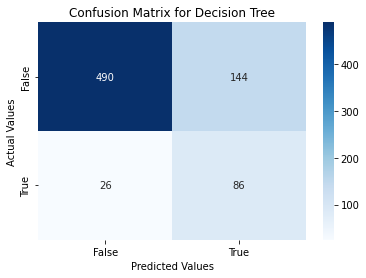

In [102]:
# Plotting the confusion matrix

labels = ['490','144','26','86']

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(dt_cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for Decision Tree');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [103]:
# Predicted values.

y_pred_dt = dt_clf.predict(X_test)

In [104]:
# Getting classification report.

dict_2 = classification_report(y_test, y_pred_dt, output_dict = True)

In [105]:
# Storing the scores in a dataframe
tempodf=pd.DataFrame(dict_2).transpose()
tempodf['Model'] = 'Decision Tree Classifier'
res_df=res_df.append(tempodf[2:-2])
res_df

,precision,recall,f1-score,support,Model
accuracy,0.662198,0.662198,0.662198,0.662198,Logistic Regression Classifier
accuracy,0.772118,0.772118,0.772118,0.772118,Decision Tree Classifier


#**Random Forest Classifier**

*Random Forest is a technique that uses ensemble learning, that combines many weak classifiers to provide solutions to complex problems.*

*As the name suggests random forest consists of many decision trees. Rather than depending on one tree it takes the prediction from each tree and based on the majority votes of predictions, predicts the final output.*

*Random forests use the bagging method. It creates a subset of the original dataset, and the final output is based on majority ranking and hence the problem of overfitting is taken care of.*

In [106]:
# Importing Necessary library

from sklearn.ensemble import RandomForestClassifier

In [107]:
#Creating an instance for the random forest regressor.

rf_clf = RandomForestClassifier()

In [108]:
# Storing the hyperparameters in Dict
params = {'n_estimators' : [750, 850],
         'max_depth': [7,9],
         'max_features' : [7,8],
         'min_samples_leaf' : [2,3]}

In [109]:
# Using GridSearchCV for hyperparameter tuning
cv = GridSearchCV(rf_clf, param_grid = params, scoring = 'roc_auc', cv =5)

In [110]:
# Fitting the model
cv.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 9], 'max_features': [7, 8],
                         'min_samples_leaf': [2, 3],
                         'n_estimators': [750, 850]},
             scoring='roc_auc')

In [111]:
# Checking the best parameters
cv.best_estimator_

RandomForestClassifier(max_depth=9, max_features=8, min_samples_leaf=2,
                       n_estimators=850)

In [112]:
# Getting the predicted classes for training and testing set

train_rf_prediction = cv.predict(X_train_sm)
test_rf_prediction = cv.predict(X_test)

In [113]:
# Getting the accuracy scores for training and testing set.

train_accuracy_rf = accuracy_score(train_rf_prediction, y_train_sm)
test_accuracy_rf = accuracy_score(test_rf_prediction, y_test)

# Display accuracies.
print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.9007106198183972
The accuracy on test data is  0.8512064343163539


In [114]:
# Confusion Matrix for random forest classifier.

rf_cf_matrix = confusion_matrix(y_test,test_rf_prediction)
rf_cf_matrix

array([[537,  97],
       [ 14,  98]])

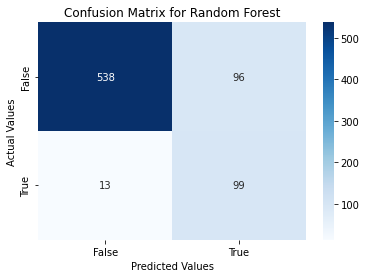

In [115]:
# Plotting the confusion matrix

labels = ['538','96','13','99']

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(rf_cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for Random Forest');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [116]:
# Predicted values.

y_pred_rf = cv.predict(X_test)

In [117]:
# Getting classification report.

dict_3 = classification_report(y_test, y_pred_rf, output_dict = True)

In [118]:
# Storing the scores in a dataframe
tempodf=pd.DataFrame(dict_3).transpose()
tempodf['Model'] = 'Random Forest Classifier'
res_df=res_df.append(tempodf[2:-2])
res_df

,precision,recall,f1-score,support,Model
accuracy,0.662198,0.662198,0.662198,0.662198,Logistic Regression Classifier
accuracy,0.772118,0.772118,0.772118,0.772118,Decision Tree Classifier
accuracy,0.851206,0.851206,0.851206,0.851206,Random Forest Classifier


#**K-Nearest Neighbours Classifier**

KNN which stands for K-Nearest Neighbours is a simple algorithm that is used for classification and regression problems in Machine Learning. KNN is also non-parametric which means the algorithm does not rely on strong assumptions instead tries to learn any functional form from the training data.

Unlike most of the algorithms with complex names, which are often confusing as to what they really mean, KNN is pretty straight forward. The algorithm considers the k nearest neighbours to predict the class or value of a data point.

*The kNN working can be explained on the basis of the below algorithm:*

* <b>Step-1:</b> Select the number K of the neighbors
* <b>Step-2:</b> Calculate the Euclidean distance of K number of neighbors
* <b>Step-3:</b> Take the K nearest neighbors as per the calculated Euclidean distance.
* <b>Step-4:</b> Among these k neighbors, count the number of the data points in each category.
* <b>Step-5:</b> Assign the new data points to that category for which the number of the neighbor is maximum.
* <b>Step-6:</b> Our model is ready.

In [119]:
# Importing necessary library

from sklearn.neighbors import KNeighborsClassifier

In [120]:
#Creating an instance for the KNN classifier.

KNN_clf = KNeighborsClassifier()

In [121]:
# Using hyperparameter tuning to get the opimal value of n_neighbors

parameters = {'n_neighbors':np.arange(1,10)}
cv_knn = GridSearchCV(KNN_clf, cv = 5, param_grid = parameters)

In [122]:
# Fitting the model

cv_knn.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [123]:
# Checking the best parameter.

cv_knn.best_estimator_

KNeighborsClassifier(n_neighbors=2)

In [124]:
# Getting the predicted classes for training and testing set

train_knn_prediction = cv_knn.predict(X_train_sm)
test_knn_prediction = cv_knn.predict(X_test)

In [125]:
# Getting the accuracy scores for training and testing set.

train_accuracy_knn = accuracy_score(train_knn_prediction, y_train_sm)
test_accuracy_knn = accuracy_score(test_knn_prediction, y_test)

# Display accuracies.

print("The accuracy on train data is ", train_accuracy_knn)
print("The accuracy on test data is ", test_accuracy_knn)

The accuracy on train data is  0.9928938018160284
The accuracy on test data is  0.9986595174262735


In [126]:
# Confusion Matrix for KNN classifier.

knn_cf_matrix = confusion_matrix(y_test,test_knn_prediction)
knn_cf_matrix

array([[634,   0],
       [  1, 111]])

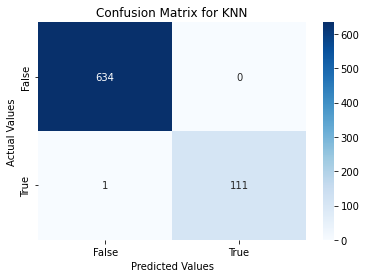

In [127]:
# Plotting the confusion matrix
labels = ['634','0','1','111']

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(knn_cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for KNN');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [128]:
# Predicted values.

y_pred_KNN = cv_knn.predict(X_test)

In [129]:
# Getting classification report.

dict_4 = classification_report(y_test, y_pred_KNN, output_dict = True)

In [130]:
# Storing the scores in a dataframe
tempodf=pd.DataFrame(dict_4).transpose()
tempodf['Model'] = 'K-Nearest Neighbours Classifier'
res_df=res_df.append(tempodf[2:-2])
res_df

,precision,recall,f1-score,support,Model
accuracy,0.662198,0.662198,0.662198,0.662198,Logistic Regression Classifier
accuracy,0.772118,0.772118,0.772118,0.772118,Decision Tree Classifier
accuracy,0.851206,0.851206,0.851206,0.851206,Random Forest Classifier
accuracy,0.998660,0.998660,0.998660,0.998660,K-Nearest Neighbours Classifier


#**Gaussian Naive Bayes:**

The Naïve Bayes algorithm is a classification technique based on the Bayes’ Theorem which assumes there is independence between the features. We interfere with applications utilizing this algorithm on a daily basis, for example it powers recommendation systems for streaming applications or adds on social media as well as many online retail websites.

Naive Bayes model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods. Let’s have a look under the hood of this major classifier.

The simple form of the calculation for Bayes Theorem is as follows:

# **P(A|B) = P(B|A) * P(A) / P(B)**

In [131]:
# Necessary library

from sklearn.naive_bayes import GaussianNB

In [132]:
# Creating model object for Naive Bayes Classifier

gnb = GaussianNB()

In [133]:
# Fitting the model

gnb.fit(X_train_sm, y_train_sm)

GaussianNB()

In [134]:
# Getting the predicted classes for training and testing set

train_class_preds_gnb = gnb.predict(X_train_sm)
test_class_preds_gnb = gnb.predict(X_test)

In [135]:
# Getting the accuracy scores for training and testing set.

train_accuracy_gnb = accuracy_score(train_class_preds_gnb, y_train_sm)
test_accuracy_gnb = accuracy_score(test_class_preds_gnb, y_test)

# Display accuracies.

print("The accuracy on train data is ", train_accuracy_gnb)
print("The accuracy on test data is ", test_accuracy_gnb)

The accuracy on train data is  0.6091590998815634
The accuracy on test data is  0.7975871313672922


In [136]:
# Confusion Matrix for logistic regression classifier.

cf_matrix_gnb = confusion_matrix(y_test,test_class_preds_gnb)
cf_matrix_gnb

array([[554,  80],
       [ 71,  41]])

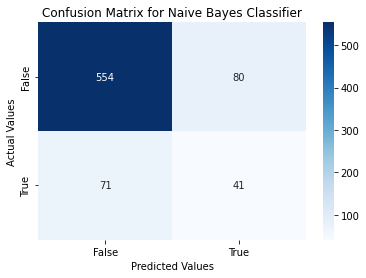

In [137]:
# Plotting the confusion matrix
labels = ['554','80','71','41']

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix_gnb, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for Naive Bayes Classifier');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [138]:
# Predicted values.

y_pred_gnb = gnb.predict(X_test)

In [139]:
# Getting classification report.

dict_5 = classification_report(y_test, y_pred_gnb, output_dict = True)

In [140]:
# Storing the scores in a dataframe
tempodf=pd.DataFrame(dict_5).transpose()
tempodf['Model'] = 'Gaussian Naive Bayes Classifier'
res_df=res_df.append(tempodf[2:-2])
res_df

,precision,recall,f1-score,support,Model
accuracy,0.662198,0.662198,0.662198,0.662198,Logistic Regression Classifier
accuracy,0.772118,0.772118,0.772118,0.772118,Decision Tree Classifier
accuracy,0.851206,0.851206,0.851206,0.851206,Random Forest Classifier
accuracy,0.998660,0.998660,0.998660,0.998660,K-Nearest Neighbours Classifier
accuracy,0.797587,0.797587,0.797587,0.797587,Gaussian Naive Bayes Classifier


#**Extreme Gradient Boost Classifier**

*XGBoost is an ensemble learning method. XGBoost is a tree based ensemble machine learning algorithm which is a scalable machine learning system for tree boosting. XGBoost stands for Extreme Gradient Boosting. It uses more accurate approximations to find the best tree model.*

*XGBoost is a tree based ensemble machine learning algorithm which has higher predicting power and performance and it is achieved by improvisation on Gradient Boosting framework by introducing some accurate approximation algorithms. XGB commonly used and frequently makes its way to the top of the leaderboard of competitions in data science. XGBoost – Greatly Boosted.*

In [141]:
# Importing XGBoost Classifier.
from xgboost import XGBClassifier

In [142]:
# Creating the hyperparameters in lists.
n_estimators = [50,80,100]
max_depth = [4,6,8]
min_samples_split = [50,100,150]
min_samples_leaf = [40,50]

# storing the hyperparameters in Dict

param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [143]:
# Create an instance of the XGBoost

xgb_model = XGBClassifier(learning_rate=0.1)

In [144]:
# Using GridSearchCV for hyperparameter tuning
xgb_random = GridSearchCV(xgb_model, param_grid = param_dict, scoring = 'roc_auc',cv=5)

In [145]:
#Fitting the model
xgb_random.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='roc_auc')

In [146]:
# Checking the best parameter.

xgb_random.best_estimator_

XGBClassifier(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [147]:
# Getting the predicted classes for training and testing set

train_xgb_prediction = xgb_random.predict(X_train_sm)
test_xgb_prediction = xgb_random.predict(X_test)

In [148]:
# Getting the accuracy scores for training and testing set.

train_accuracy_xgb = accuracy_score(train_xgb_prediction, y_train_sm)
test_accuracy_xgb = accuracy_score(test_xgb_prediction, y_test)

# Display accuracies.

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", test_accuracy_xgb)

The accuracy on train data is  0.9832214765100671
The accuracy on test data is  0.9745308310991957


In [149]:
# Confusion Matrix for logistic regression classifier.

cf_matrix_xgb = confusion_matrix(y_test,test_xgb_prediction)
cf_matrix_xgb

array([[631,   3],
       [ 16,  96]])

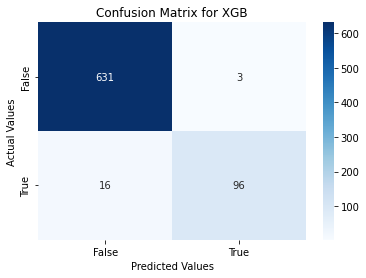

In [150]:
#Plotting the confusion matrix.
labels = ['631','3','16','96']

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix_xgb, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for XGB');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [151]:
# Predicted values.

y_pred_xgb = xgb_random.predict(X_test)

In [152]:
# Getting classification report.

dict_6 = classification_report(y_test, y_pred_xgb, output_dict = True)

In [153]:
#Storing the scores in a dataframe.
tempodf=pd.DataFrame(dict_6).transpose()
tempodf['Model'] = 'XGBoost Classifier'
res_df=res_df.append(tempodf[2:-2])
res_df

,precision,recall,f1-score,support,Model
accuracy,0.662198,0.662198,0.662198,0.662198,Logistic Regression Classifier
accuracy,0.772118,0.772118,0.772118,0.772118,Decision Tree Classifier
accuracy,0.851206,0.851206,0.851206,0.851206,Random Forest Classifier
accuracy,0.998660,0.998660,0.998660,0.998660,K-Nearest Neighbours Classifier
accuracy,0.797587,0.797587,0.797587,0.797587,Gaussian Naive Bayes Classifier
accuracy,0.974531,0.974531,0.974531,0.974531,XGBoost Classifier


#**Support Vector Machine**

SVM is a powerful supervised algorithm that works best on smaller datasets but on complex ones. Support Vector Machine, abbreviated as SVM can be used for both regression and classification tasks, but generally, they work best in classification problems.

**Support Vectors:** These are the points that are closest to the hyperplane. A separating line will be defined with the help of these data points.

**Margin:** it is the distance between the hyperplane and the observations closest to the hyperplane (support vectors). In SVM large margin is considered a good margin. There are two types of margins hard margin and soft margin.

In [154]:
# Importing Support vector machine Classifier.

from sklearn import svm

In [155]:
# Create a svm Classifier

svmc = svm.SVC(kernel='poly')

In [156]:
# Fitting the model with training set

svmc.fit(X_train_sm, y_train_sm)

SVC(kernel='poly')

In [157]:
# Getting the predicted classes for training and testing set

train_svm_prediction = svmc.predict(X_train_sm)
test_svm_prediction = svmc.predict(X_test)

In [158]:
# Getting the accuracy scores for training and testing set.

train_accuracy_svm = accuracy_score(train_svm_prediction, y_train_sm)
test_accuracy_svm = accuracy_score(test_svm_prediction, y_test)

# Display accuracies.
print("The accuracy on train data is ", train_accuracy_svm)
print("The accuracy on test data is ", test_accuracy_svm)

The accuracy on train data is  0.7410185550730359
The accuracy on test data is  0.710455764075067


In [159]:
# Confusion Matrix for random forest classifier.

svm_cf_matrix = confusion_matrix(y_test,test_svm_prediction)
svm_cf_matrix

array([[445, 189],
       [ 27,  85]])

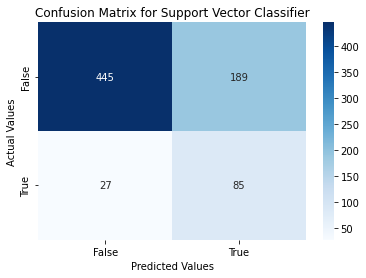

In [160]:
# Plotting the confusion matrix

labels = ['445','189','27','85']

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(svm_cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for Support Vector Classifier');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [161]:
# Predicted values.

y_pred_svm = svmc.predict(X_test)

In [162]:
# Getting classification report.

dict_7 = classification_report(y_test, y_pred_svm, output_dict = True)

In [163]:
#Storing scores in a dataframe.
tempodf=pd.DataFrame(dict_7).transpose()
tempodf['Model'] = 'Support Vector Machine'
res_df=res_df.append(tempodf[2:-2])
res_df

,precision,recall,f1-score,support,Model
accuracy,0.662198,0.662198,0.662198,0.662198,Logistic Regression Classifier
accuracy,0.772118,0.772118,0.772118,0.772118,Decision Tree Classifier
accuracy,0.851206,0.851206,0.851206,0.851206,Random Forest Classifier
accuracy,0.998660,0.998660,0.998660,0.998660,K-Nearest Neighbours Classifier
accuracy,0.797587,0.797587,0.797587,0.797587,Gaussian Naive Bayes Classifier
accuracy,0.974531,0.974531,0.974531,0.974531,XGBoost Classifier
accuracy,0.710456,0.710456,0.710456,0.710456,Support Vector Machine


## **Comparing Models**

In [164]:
# Necessary library
from prettytable import PrettyTable

In [165]:
# Plotting the table to compare the accuracy scores of all the models.

print('**** Comparison of  Models ****')
table = PrettyTable(['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1_score'])
table.add_row(['Logistic regression', 0.6621,	0.6621,	0.6621,	0.6621])
table.add_row(['Decision Tree Classifier', 0.7613,	0.7613,	0.7613,	0.7613])
table.add_row(['Random Forest Classifier', 0.8512,	0.8512,	0.8512,	0.8512])
table.add_row(['K-Nearest Neighbours',0.9986,	0.9986,	0.9986,	0.9986])
table.add_row(['Gaussian Naive Bayes', 0.7975,	0.7975,	0.7975,	0.7975])
table.add_row(['XGBoost Classifier', 0.9745,	0.9745,	0.9745,	0.9745])
table.add_row(['Support Vector Machine', 0.7104,	0.7104,	0.7104,	0.7104])


print(table)

**** Comparison of  Models ****
+--------------------------+---------------+-----------+--------+----------+
|          Model           | Test Accuracy | Precision | Recall | F1_score |
+--------------------------+---------------+-----------+--------+----------+
|   Logistic regression    |     0.6621    |   0.6621  | 0.6621 |  0.6621  |
| Decision Tree Classifier |     0.7613    |   0.7613  | 0.7613 |  0.7613  |
| Random Forest Classifier |     0.8512    |   0.8512  | 0.8512 |  0.8512  |
|   K-Nearest Neighbours   |     0.9986    |   0.9986  | 0.9986 |  0.9986  |
|   Gaussian Naive Bayes   |     0.7975    |   0.7975  | 0.7975 |  0.7975  |
|    XGBoost Classifier    |     0.9745    |   0.9745  | 0.9745 |  0.9745  |
|  Support Vector Machine  |     0.7104    |   0.7104  | 0.7104 |  0.7104  |
+--------------------------+---------------+-----------+--------+----------+


# **Conclusions:**

* *In conclusion, All the features provided in the dataset are extremely important and contribute towards the risk of getting CHDs. Although, we can conclude some majorly important features like:*
* *As **age increases** the risk of getting diagnosed with **heart disease also increases**.*
*	***Cigarette consumption*** *is also a* ***major factor*** *that causes CHDs.*
*	*Patients having **Diabetes and cholesterol** problems show a **higher risk of CHDs**.*
*	*Patients having **high glucose levels** are **more prone to CHDs**.*
*	*Patients with a **history of “strokes”** have a **higher** **chance** of developing CHDs.*
*	*Patients with **high BMI(Body Mass Index)** are at **more risk of getting diagnosed with CHDs**.*

* *Finally we can say that, **XGBoost Classifier** has performed best among all the models with the **accuracy**  of **97%** & **f1-score** of **0.9745**. It is by far the second highest score we have achieved.So,It's safe to say that XGBoost Classifier provides an optimal solution to our problem.*

***At the end, Thankyou to you for going through our project till the very end, we appreciate your time.***
